In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [6]:
data = pd.read_csv('MC CRASHES DATA FINAL AL 2.csv')
data.head()

,Crash Number,Day of the Week,Day,Time of Day,Time,Place,Controlled Access,Access,Manner of Crash,Crash Manner,...,Lighting Conditions,Light Conditions,Weather,Weather C,CU Roadway Condition,Roadway Condition,CU Roadway Curvature and Grade,Roadway Curvature,Latitude,Longitude
0,600073,Wednesday,Weekday,3:00 PM to 3:59 PM,Off-Peak Hour,Rural,Not a Controlled Access,Not Controlled,Single Vehicle Crash (all types),Single Vehicle Crash,...,Daylight,Daylight,Cloudy,Foggy,Dry,Dry,Straight with Down Grade,Straight,33.657067,-86.268114
1,600101,Wednesday,Weekday,3:00 PM to 3:59 PM,Off-Peak Hour,Urban,Not a Controlled Access,Not Controlled,Rear End (front to rear),Rear-End,...,Daylight,Daylight,Clear,Clear,Dry,Dry,Straight and Level,Straight,33.453778,-87.012370
2,601177,Saturday,Weekend,3:00 PM to 3:59 PM,Off-Peak Hour,Rural,Not a Controlled Access,Not Controlled,Single Vehicle Crash (all types),Single Vehicle Crash,...,Daylight,Daylight,Clear,Clear,Dry,Dry,Curve Left and Down Grade,Curve,30.742780,-87.889280
3,601310,Saturday,Weekend,6:00 PM to 6:59 PM,Off-Peak Hour,Urban,Not a Controlled Access,Not Controlled,Angle (front to side) Opposite Direction,Angular,...,Dusk,Dark,Cloudy,Foggy,CU is Unknown,Dry,CU is Unknown,Curve,30.628985,-88.088910
4,601108,Saturday,Weekend,11:00 AM to 11:59 AM,Off-Peak Hour,Rural,Not a Controlled Access,Not Controlled,Single Vehicle Crash (all types),Single Vehicle Crash,...,Daylight,Daylight,Clear,Clear,Dry,Dry,Curve Left and Level,Curve,34.057063,-86.860597


In [8]:
x = data[['Day ', 'Time ', 'Place', 'Access ', 'Crash Manner', 'Intersection Relationship', 'Intersection Location', 'Functional Class', 'Light Conditions ', 'Weather C', 'Roadway Condition', 'Roadway Curvature', 'Latitude', 'Longitude']]

In [10]:
y = data['Crash Severity']

In [12]:
#Descriptive Statistics
data.describe()
data['Crash Severity'].value_counts()  # Frequency of different crash severities

Crash Severity
Non-Incapacitating Injury    2100
Property Damage Only         1964
Suspected Serious Injury     1885
Possible Injury               779
Fatal Injury                  417
Name: count, dtype: int64

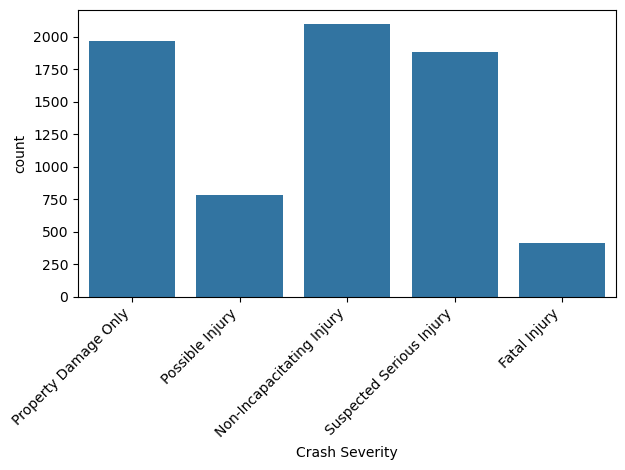

In [14]:
#Data Visualization
severity_order = ['Property Damage Only', 'Possible Injury', 'Non-Incapacitating Injury', 'Suspected Serious Injury', 'Fatal Injury']
sns.countplot(x='Crash Severity', data=data, order=severity_order)
plt.xticks(rotation=45, ha='right') # rotate x-axis labels
plt.tight_layout()# Adjust subplot parameters for a tight layout.
plt.show()

In [15]:
severity_order = ['Property Damage Only', 'Possible Injury', 'Non-Incapacitating Injury', 'Suspected Serious Injury', 'Fatal Injury']
data['Crash Severity'] = pd.Categorical(data['Crash Severity'], categories=severity_order, ordered=True)


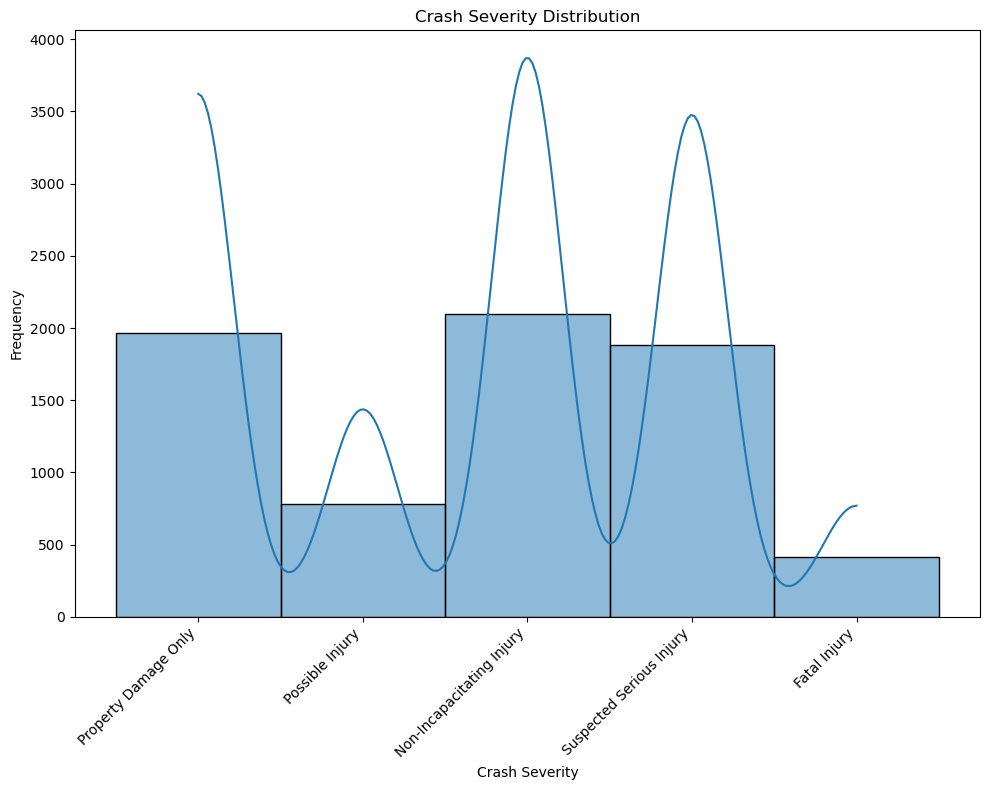

In [18]:
plt.figure(figsize=(10,8))
sns.histplot(x='Crash Severity', data=data, kde=True)
plt.title('Crash Severity Distribution')
plt.xlabel('Crash Severity')
plt.ylabel('Frequency')

plt.xticks(severity_order, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
print(data['Crash Severity'].unique())

['Possible Injury', 'Property Damage Only', 'Suspected Serious Injury', 'Non-Incapacitating Injury', 'Fatal Injury']
Categories (5, object): ['Property Damage Only' < 'Possible Injury' < 'Non-Incapacitating Injury' < 'Suspected Serious Injury' < 'Fatal Injury']


In [22]:
def group_severity(severity):
    if severity in ['Property Damage Only', 'Possible Injury', 'Non-Incapacitating Injury']:
        return 'Minor Injury'
    elif severity in ['Suspected Serious Injury', 'Fatal Injury']:
        return 'Severe/Fatal Injury'
    else:
        return severity  # Keep original value if not in specified categories

data['Grouped_Severity'] = data['Crash Severity'].apply(group_severity)

In [24]:
data[['Crash Severity', 'Grouped_Severity']].head()

,Crash Severity,Grouped_Severity
0,Possible Injury,Minor Injury
1,Property Damage Only,Minor Injury
2,Property Damage Only,Minor Injury
3,Suspected Serious Injury,Severe/Fatal Injury
4,Non-Incapacitating Injury,Minor Injury


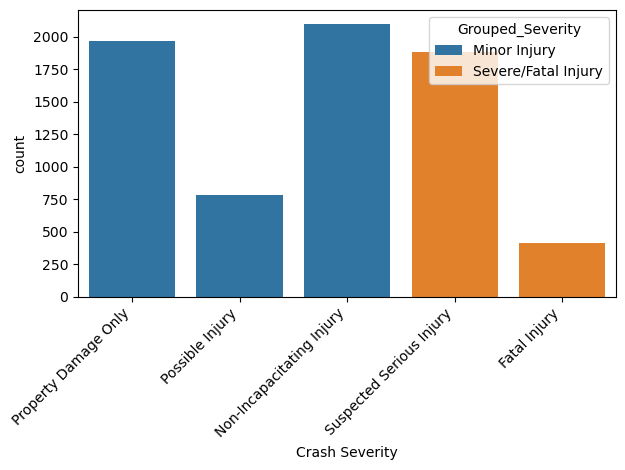

In [26]:
# Count plot
sns.countplot(x='Crash Severity', hue='Grouped_Severity', data=data)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
y = data['Grouped_Severity']

In [30]:
y.value_counts()

Grouped_Severity
Minor Injury           4843
Severe/Fatal Injury    2302
Name: count, dtype: int64

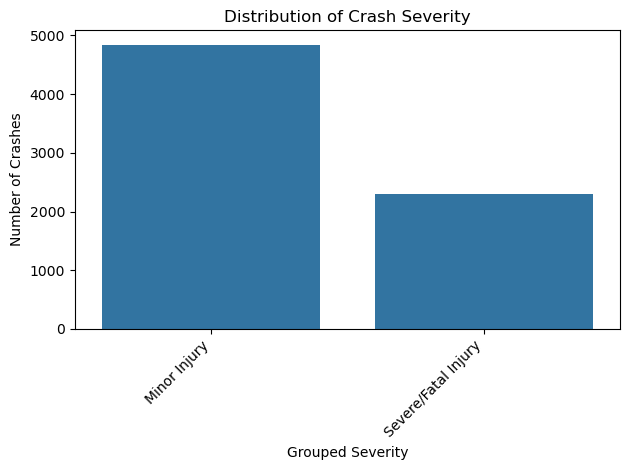

In [32]:
# Calculate value counts
severity_counts = y.value_counts()

# Create a bar plot
sns.countplot(x=y)
plt.title('Distribution of Crash Severity')
plt.xlabel('Grouped Severity')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
x = data[['Day ', 'Time ', 'Place', 'Access ', 'Crash Manner', 'Intersection Relationship', 'Intersection Location', 'Functional Class', 'Light Conditions ', 'Weather C', 'Roadway Condition', 'Roadway Curvature']]
y = data['Grouped_Severity']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [38]:
from sklearn.preprocessing import OneHotEncoder
# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

In [40]:
# Fit the encoder on the training data and transform both training and testing data
x_encoded = encoder.fit_transform(x)
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

In [42]:
print(x_encoded.shape)
print(type(x_encoded))

(7145, 38)
<class 'numpy.ndarray'>


In [44]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg = LogisticRegression()

In [48]:
logreg.fit(x_train_encoded, y_train)

LogisticRegression()

In [50]:
# Predict
y_hat = logreg.predict(x_test_encoded)
print("Predictions:", y_hat)

Predictions: ['Minor Injury' 'Minor Injury' 'Minor Injury' ... 'Minor Injury'
 'Minor Injury' 'Minor Injury']


In [52]:
model = logreg
coefficients = model.coef_
intercept = model.intercept_
# Print the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-0.06379521 -0.07782658 -0.03234378 -0.10927802  0.22185185 -0.36347365
  -0.07538406 -0.06623774  0.26042532  0.80658111 -0.96175966  0.01052278
  -0.49609895  0.15460103  0.08410657  0.04957861 -0.19120041 -0.16125861
   0.01963681  0.11088937 -0.00396056  0.02454668  0.0945439  -0.00550007
  -0.11412456  0.33283637 -0.58085292  0.10215725 -0.24377905 -0.1088956
   0.11940469  0.08273251 -0.04111356 -0.19374984  0.1430653  -0.2846871
   0.04167519 -0.18329699]]
Intercept: [-0.19381011]


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
print(confusion_matrix)

[[1625   48]
 [ 770   58]]


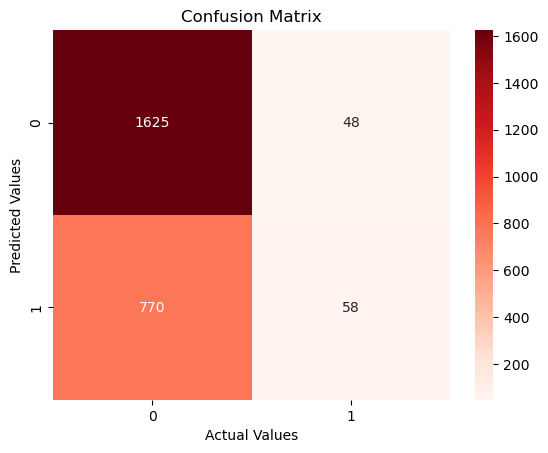

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

                     precision    recall  f1-score   support

       Minor Injury       0.68      0.97      0.80      1673
Severe/Fatal Injury       0.55      0.07      0.12       828

           accuracy                           0.67      2501
          macro avg       0.61      0.52      0.46      2501
       weighted avg       0.64      0.67      0.58      2501



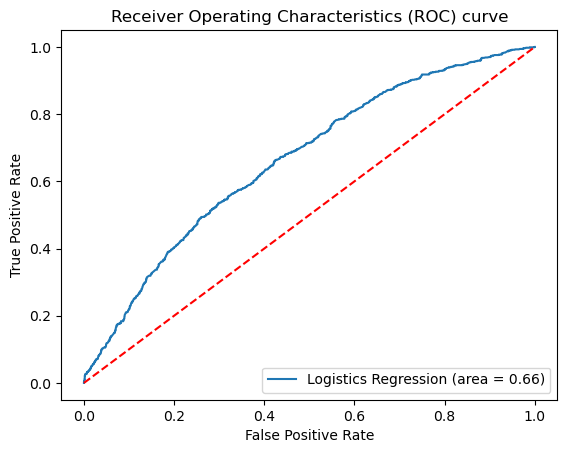

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer

# Convert string labels to binary using LabelBinarizer
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)

# Get predicted probabilities instead of class labels
y_probs = logreg.predict_proba(x_test_encoded)[:, 1]  # Probability of the positive class


# Calculate ROC AUC score
logit_roc_auc = roc_auc_score(y_test, y_probs)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistics Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) curve')
plt.legend(loc='lower right')
plt.show()


In [62]:
# Print coefficients and cut points
coefficients = model.coef_[0] 
for i, param in enumerate(coefficients):  
    if i < len(x.columns):
        print(f"{x.columns[i]}: {param:.4f}")  # Print coefficients
    else:
        print(f"Cut Point {i - len(x.columns) + 1}: {param:.4f}")  # Print cut points

Day : -0.0638
Time : -0.0778
Place: -0.0323
Access : -0.1093
Crash Manner: 0.2219
Intersection Relationship: -0.3635
Intersection Location: -0.0754
Functional Class: -0.0662
Light Conditions : 0.2604
Weather C: 0.8066
Roadway Condition: -0.9618
Roadway Curvature: 0.0105
Cut Point 1: -0.4961
Cut Point 2: 0.1546
Cut Point 3: 0.0841
Cut Point 4: 0.0496
Cut Point 5: -0.1912
Cut Point 6: -0.1613
Cut Point 7: 0.0196
Cut Point 8: 0.1109
Cut Point 9: -0.0040
Cut Point 10: 0.0245
Cut Point 11: 0.0945
Cut Point 12: -0.0055
Cut Point 13: -0.1141
Cut Point 14: 0.3328
Cut Point 15: -0.5809
Cut Point 16: 0.1022
Cut Point 17: -0.2438
Cut Point 18: -0.1089
Cut Point 19: 0.1194
Cut Point 20: 0.0827
Cut Point 21: -0.0411
Cut Point 22: -0.1937
Cut Point 23: 0.1431
Cut Point 24: -0.2847
Cut Point 25: 0.0417
Cut Point 26: -0.1833
